In [2]:
import pandas as pd

df = pd.read_csv("Mall_Customers.csv")

df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


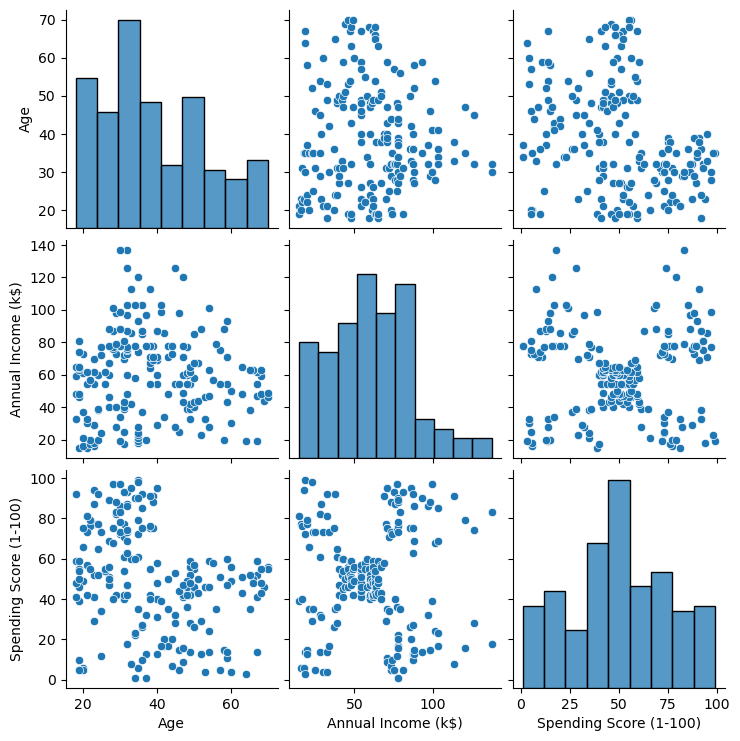

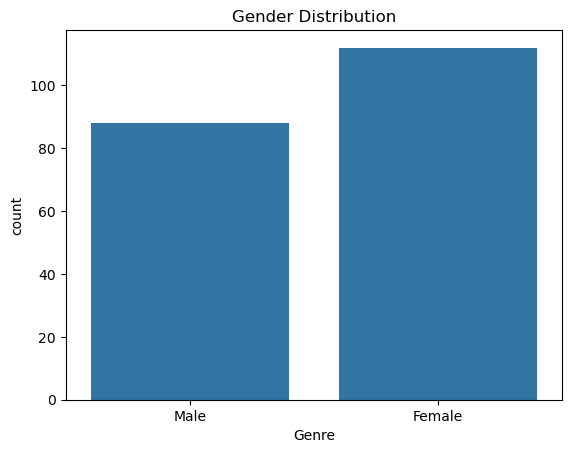

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df.drop(columns=["CustomerID"]))
plt.show()

# Gender distribution
sns.countplot(x="Genre", data=df)
plt.title("Gender Distribution")
plt.show()


In [5]:
# Convert 'Genre' to numeric
df['Genre'] = df['Genre'].map({'Male': 0, 'Female': 1})


In [8]:
X = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]


C:\Users\Tirtha Desai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Tirtha Desai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Tirtha Desai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Tirtha Desai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to 

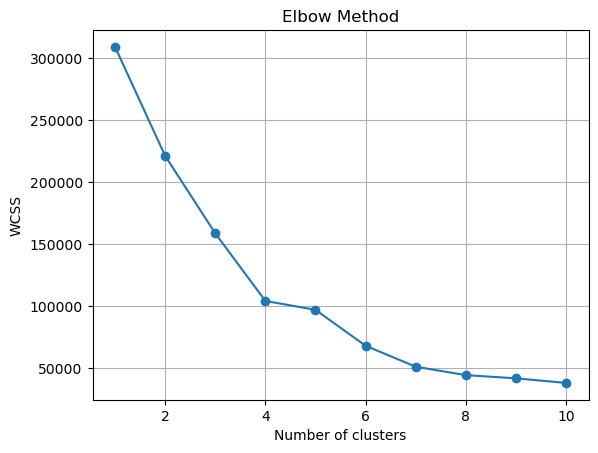

In [10]:
from sklearn.cluster import KMeans

wcss = []  # Within-cluster sum of square
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.grid()
plt.show()


In [12]:
# Choose k based on elbow curve (usually k=5)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X)


C:\Users\Tirtha Desai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


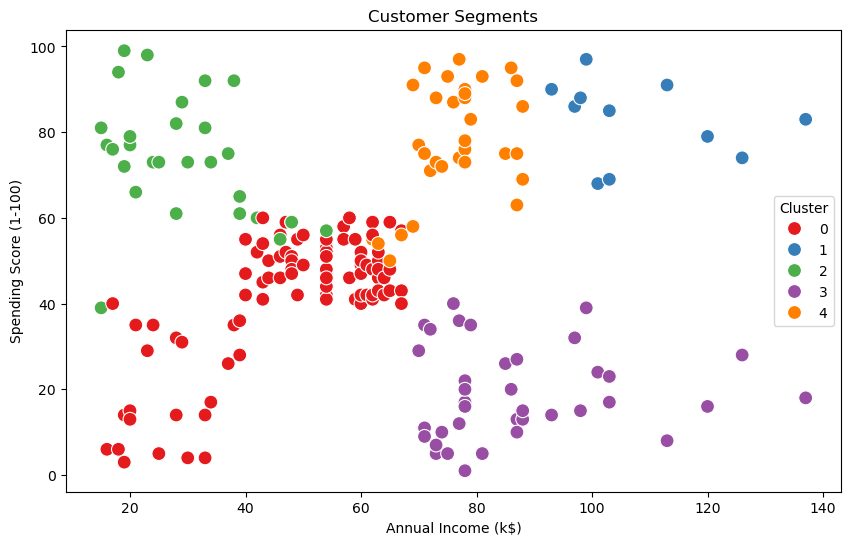

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Cluster", palette="Set1", s=100)
plt.title("Customer Segments")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()


In [16]:
df.groupby('Cluster')[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,46.213483,47.719101,41.797753
1,32.454545,108.181818,82.727273
2,24.689655,29.586207,73.655172
3,40.394737,87.000000,18.631579
4,31.787879,76.090909,77.757576


In [18]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, df['Cluster'])
print("Silhouette Score:", score)


Silhouette Score: 0.3575963460506624


In [20]:
df['Cluster'].value_counts()


Cluster
0    89
3    38
4    33
2    29
1    11
Name: count, dtype: int64